In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Loading train and test data

In [2]:
train=pd.read_csv('titanic/train.csv')
test= pd.read_csv('titanic/test.csv')

In [3]:
# concatenate the two sets to process data equally
all_titanic= pd.concat([train,test], sort=False)

### Exploring data set for insights

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
all_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
all_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### Transforming 'Cabin' and 'Embarked' into one character categories (one additional for NAN='n')

In [7]:
all_titanic['Cabin']=all_titanic['Cabin'].apply(lambda x: (str(x))[0])
all_titanic['Embarked']=all_titanic['Embarked'].apply(lambda x: (str(x))[0])
all_titanic=all_titanic.drop('Ticket',axis=1)
all_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S


## Describe data

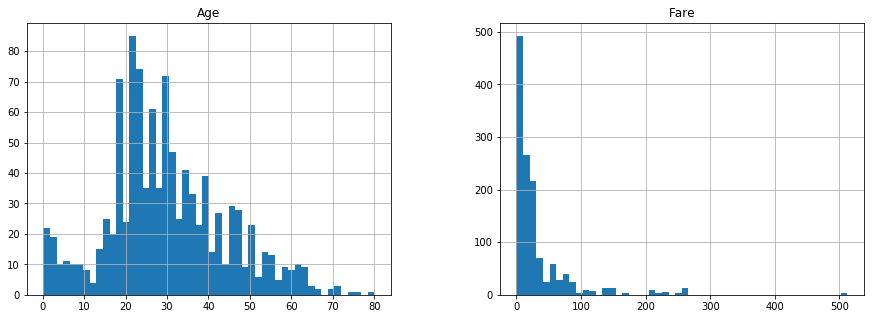

In [8]:
all_titanic.loc[:,['Age', 'Fare']].hist(bins=50, figsize=(15,5))
plt.show()

In [9]:
counts1=all_titanic['Sex'].value_counts()
counts2=all_titanic['Pclass'].value_counts()
counts3=all_titanic['Embarked'].value_counts()
counts4=all_titanic['Parch'].value_counts()
counts5=all_titanic['SibSp'].value_counts()
counts6=all_titanic['Cabin'].value_counts()
counts7=all_titanic['Survived'].value_counts()

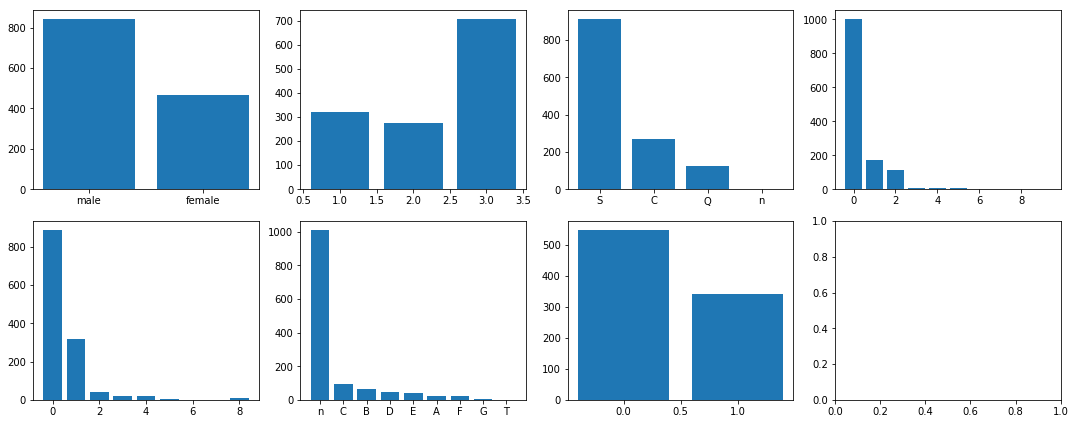

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,6))
fig.tight_layout()
plt.subplot(241)
ax1=plt.bar(counts1.index, counts1.values)
plt.subplot(242)
ax2=plt.bar(counts2.index, counts2.values)
plt.subplot(243)
ax3=plt.bar(counts3.index, counts3.values)
plt.subplot(244)
ax4=plt.bar(counts4.index, counts4.values)
plt.subplot(245)
ax5=plt.bar(counts5.index, counts5.values)
plt.subplot(246)
ax6=plt.bar(counts6.index, counts6.values)
plt.subplot(247)
ax7=plt.bar(counts7.index, counts7.values)

In [11]:
# proportions of values male/female, fare categories, ticket categories, percentage of cabins

## Look for correlations

In [12]:
corr_matrix=all_titanic.corr()

In [13]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc050650b70>,
      dtype=object)

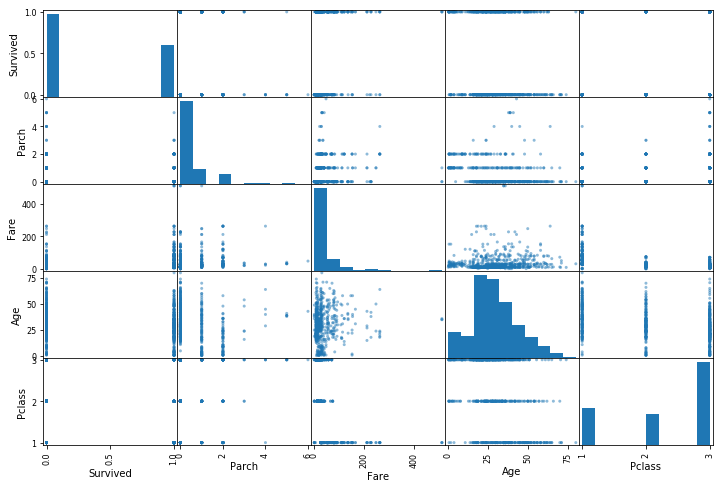

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Parch", "Fare", "Age", 'Pclass']
scatter_matrix(train[attributes], figsize=(12, 8))

## First try correlation one-way anova

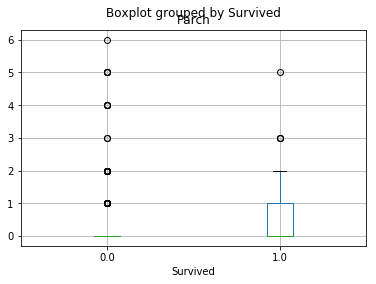

In [15]:
from scipy import stats
# F,p=stats.f_oneway(strat_train_set[''])
all_titanic.boxplot("Parch", by ='Survived')

In [16]:
# Try chi square to find correlations

## Transform categorical values

In [17]:
all_titanic=pd.concat([all_titanic, pd.get_dummies(all_titanic['Cabin'],prefix='cab',drop_first=True)],axis=1)
all_titanic=pd.concat([all_titanic, pd.get_dummies(all_titanic['Sex'],prefix='sex',drop_first=True)],axis=1)
all_titanic=pd.concat([all_titanic, pd.get_dummies(all_titanic['Pclass'],prefix='class',drop_first=True)],axis=1)
all_titanic=pd.concat([all_titanic, pd.get_dummies(all_titanic['Embarked'],prefix='emb',drop_first=True)],axis=1)

In [18]:
all_titanic.drop(['Cabin','Sex','Pclass','Embarked'],axis=1,inplace=True)

In [19]:
all_titanic['Age'].fillna(all_titanic['Age'].median(), inplace=True)
all_titanic['Fare'].fillna(all_titanic['Fare'].median(),inplace=True)

In [20]:
# all_titanic.info()

In [21]:
titanic_train=all_titanic.iloc[0:891]
titanic_unseen=all_titanic.iloc[891:]

In [22]:
titanic_train=titanic_train.drop(['Name','PassengerId'],axis=1)

In [23]:
titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,cab_B,cab_C,cab_D,cab_E,cab_F,cab_G,cab_T,cab_n,sex_male,class_2,class_3,emb_Q,emb_S,emb_n
0,0.0,22.0,1,0,7.2500,0,0,0,0,0,0,0,1,1,0,1,0,1,0
1,1.0,38.0,1,0,71.2833,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,26.0,0,0,7.9250,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,1.0,35.0,1,0,53.1000,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0.0,35.0,0,0,8.0500,0,0,0,0,0,0,0,1,1,0,1,0,1,0


## Divide train and test sets

Stratified split to keep passenger sex in the same proportion

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(titanic_train, titanic_train['sex_male']):
    strat_titanic_train=titanic_train.loc[train_index]
    strat_titanic_test=titanic_train.loc[test_index]

In [25]:
print(len(strat_titanic_train), "train +", len(strat_titanic_test), "test")

712 train + 179 test


In [26]:
titanic_train['sex_male'].value_counts()/len(titanic_train)

1    0.647587
0    0.352413
Name: sex_male, dtype: float64

In [27]:
strat_titanic_train['sex_male'].value_counts()/len(strat_titanic_train)

1    0.647472
0    0.352528
Name: sex_male, dtype: float64

In [28]:
strat_titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,cab_B,cab_C,cab_D,cab_E,cab_F,cab_G,cab_T,cab_n,sex_male,class_2,class_3,emb_Q,emb_S,emb_n
788,1.0,1.0,1,2,20.5750,0,0,0,0,0,0,0,1,1,0,1,0,1,0
347,1.0,28.0,1,0,16.1000,0,0,0,0,0,0,0,1,0,0,1,0,1,0
629,0.0,28.0,0,0,7.7333,0,0,0,0,0,0,0,1,1,0,1,1,0,0
734,0.0,23.0,0,0,13.0000,0,0,0,0,0,0,0,1,1,1,0,0,1,0
106,1.0,21.0,0,0,7.6500,0,0,0,0,0,0,0,1,0,0,1,0,1,0


## Preparing the data for ML algorithms

Divide data and data labels sets. Transform dataframe to numpy array. 

In [29]:
train = strat_titanic_train.drop("Survived", axis=1) 
train_labels= strat_titanic_train["Survived"].copy()

In [30]:
train.shape

(712, 18)

In [31]:
trainX=train.values
train_labelsY=train_labels.values

Prepare the test data (future use)

In [32]:
test = strat_titanic_test.drop("Survived", axis=1) 
test_labels= strat_titanic_test["Survived"].copy()

In [33]:
testX=test.values
test_labelsY=test_labels.values

## Select and train a model

In [34]:
import sklearn.metrics as metrics

In [35]:
from sklearn.model_selection import GridSearchCV

### 1. SGDClassifier

In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

sgd=SGDClassifier(loss='log', max_iter=5, tol=-np.infty, random_state=42)
sgd_mdl=sgd.fit(trainX,train_labelsY)

In [37]:
# train accuracy
cross_val_score(sgd, trainX, train_labelsY, cv=3, scoring="roc_auc")

array([0.78290693, 0.66817841, 0.6862069 ])

Calculating measures on test set

In [38]:
predictions= pd.DataFrame(sgd_mdl.predict(testX))
probs=pd.DataFrame(sgd_mdl.predict_proba(testX))

/home/aruiz/.virtualenvs/CSmachineLearning/lib/python3.5/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [39]:
sgd_accuracy = metrics.accuracy_score(test_labelsY, predictions)  
sgd_roc_auc = metrics.roc_auc_score(test_labelsY, probs[1])  
sgd_f1=metrics.f1_score(test_labelsY, predictions)

In [40]:
sgd_recall=metrics.recall_score(test_labelsY,predictions)

In [41]:
sgd_precision=metrics.precision_score(test_labelsY,predictions)

In [42]:
sgd_cv_scores=cross_val_score(sgd,testX,test_labelsY, scoring='accuracy', cv=3)

In [43]:
sgd_cv_mean=sgd_cv_scores.sum()/len(sgd_cv_scores)

### 2. Decision Tree classifier

In [44]:
 from sklearn.tree import DecisionTreeClassifier

In [45]:
tree_mdl=DecisionTreeClassifier(random_state=42)
tree_mdl.fit(trainX,train_labelsY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [46]:
# train accuracy
cross_val_score(tree_mdl, trainX, train_labelsY, scoring='roc_auc',cv=3)

array([0.74746014, 0.72904798, 0.76004498])

In [47]:
print(sorted(zip(map(lambda x: round(x, 4), tree_mdl.feature_importances_), train), reverse=True)  )

[(0.3143, 'sex_male'), (0.2372, 'Fare'), (0.2116, 'Age'), (0.0641, 'class_3'), (0.0489, 'SibSp'), (0.0366, 'cab_n'), (0.0215, 'Parch'), (0.0147, 'emb_S'), (0.0118, 'emb_Q'), (0.0118, 'cab_E'), (0.0107, 'class_2'), (0.0074, 'cab_B'), (0.0041, 'cab_D'), (0.0031, 'cab_F'), (0.0022, 'cab_C'), (0.0, 'emb_n'), (0.0, 'cab_T'), (0.0, 'cab_G')]


Calculating accuracy/precision measures on test set

In [48]:
predictions=pd.DataFrame(tree_mdl.predict(testX))
probs=pd.DataFrame(tree_mdl.predict_proba(testX))

In [49]:
tree_accuracy = metrics.accuracy_score(test_labelsY, predictions)  
tree_roc_auc = metrics.roc_auc_score(test_labelsY, probs[1])  
tree_f1=metrics.f1_score(test_labelsY, predictions)

In [50]:
tree_recall=metrics.recall_score(test_labelsY,predictions)

In [51]:
tree_precision=metrics.precision_score(test_labelsY,predictions)

In [52]:
tree_cv_scores=cross_val_score(tree_mdl,testX,test_labelsY,scoring='accuracy',cv=3)

In [53]:
tree_cv_mean=tree_cv_scores.sum()/len(tree_cv_scores)

#### Fine Tunning

In [54]:
depth_list=np.linspace(1,30,30,endpoint=True).tolist()
param_grid = [
{'max_depth': depth_list},
{'max_features':[2,3,4,12,16]},
{'max_depth': [3,5,9,10], 'max_features': [2, 3, 4]},
{'max_depth':[3], 'min_samples_leaf':[1, 2, 3], 'min_samples_split':[2,3,6]},
]

In [55]:
grid_search = GridSearchCV(tree_mdl, param_grid, cv=5,scoring='accuracy')
grid_search.fit(trainX,train_labelsY)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]}, {'max_features': [2, 3, 4, 12, 16]}, {'max_features': [2, 3, 4], 'max_depth': [3, 5, 9, 10]}, {'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 6], 'max_depth': [3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [56]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [57]:
tree_mdl_tuned=grid_search.best_estimator_
tree_mdl_tuned.fit(trainX,train_labelsY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [58]:
cross_val_score(tree_mdl, trainX, train_labelsY, cv=3)

array([0.76890756, 0.73417722, 0.76793249])

### 3. Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,max_depth=2,random_state=42)
rf_mdl=rf.fit(trainX,train_labelsY)
rf_mdl.score(trainX,train_labelsY)

0.797752808988764

Calculating measures of accuracy/precision on test set

In [60]:
predictions = pd.DataFrame(rf_mdl.predict(testX))
probs = pd.DataFrame(rf_mdl.predict_proba(testX))

In [61]:
rf_accuracy = metrics.accuracy_score(test_labelsY, predictions)  
rf_roc_auc = metrics.roc_auc_score(test_labelsY, probs[1])  
rf_f1=metrics.f1_score(test_labelsY, predictions)

In [62]:
rf_cv_scores = cross_val_score(rf_mdl, testX, test_labelsY, scoring='precision', cv=3) 
print(rf_cv_scores)

[0.82352941 1.         0.75      ]


In [63]:
rf_cv_mean=rf_cv_scores.sum()/len(rf_cv_scores)

In [64]:
rf_recall=metrics.recall_score(test_labelsY,predictions)

In [65]:
rf_precision=metrics.precision_score(test_labelsY,predictions)

#### Fine tuning

In [66]:
param_grid = [
{'n_estimators': [3, 10, 30,50,100], 'max_features': [2, 4, 6, 8]},
{'max_depth':[3,6,8,10], 'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4]},
]

In [67]:
grid_search = GridSearchCV(rf, param_grid, cv=5,scoring='average_precision')
grid_search.fit(trainX,train_labelsY)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_features': [2, 4, 6, 8], 'n_estimators': [3, 10, 30, 50, 100]}, {'max_features': [2, 3, 4], 'n_estimators': [3, 10, 30], 'max_depth': [3, 6, 8, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='average_precision', verbose=0)

In [68]:
grid_search.best_params_

{'max_depth': 6, 'max_features': 2, 'n_estimators': 30}

In [69]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [70]:
# cv_scores=grid_search.cv_results_
# for mean, params, in zip(cv_scores['mean_test_score'],cv_scores['params']):
#     print(np.sqrt(-mean),params)

In [71]:
# Applying new classifier
rf_tuned=grid_search.best_estimator_

In [72]:
rf_mdl=rf_tuned.fit(trainX,train_labelsY)
rf_mdl.score(trainX,train_labelsY)

0.8707865168539326

In [73]:
predictions = pd.DataFrame(rf_mdl.predict(testX))
probs = pd.DataFrame(rf_mdl.predict_proba(testX))

In [74]:
rf_accuracy = metrics.accuracy_score(test_labelsY, predictions)  
rf_roc_auc = metrics.roc_auc_score(test_labelsY, probs[1])  
rf_f1=metrics.f1_score(test_labelsY, predictions)

### 4. KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainX, train_labelsY) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Measures on test set

In [77]:
predictions = pd.DataFrame(neigh.predict(testX))  
probs=pd.DataFrame(neigh.predict_proba(testX))

In [78]:
neigh_accuracy = metrics.accuracy_score(test_labelsY, predictions)  
neigh_roc_auc = metrics.roc_auc_score(test_labelsY, probs[1])  
neigh_f1= metrics.f1_score(test_labelsY, predictions)  

In [79]:
neigh_cv_scores=cross_val_score(neigh,testX,test_labelsY, scoring='accuracy',cv=3)

In [80]:
neigh_cv_mean=neigh_cv_scores.sum()/len(neigh_cv_scores)

In [81]:
neigh_recall=metrics.recall_score(test_labelsY, predictions)

In [82]:
neigh_precision=metrics.precision_score(test_labelsY, predictions)

### Evaluating all models

In [83]:
eval_matrix=pd.DataFrame({
    'model': ['SGD','Decision Tree', 'Random Forest','KNN'],
    'accuracy':[sgd_accuracy,tree_accuracy,rf_accuracy,neigh_accuracy],
    'roc_auc':[sgd_roc_auc,tree_roc_auc,rf_roc_auc,neigh_roc_auc],
    'f1 score':[sgd_f1,tree_f1,rf_f1,neigh_f1],
    'precision':[sgd_precision,tree_precision,rf_precision,neigh_precision],
    'recall':[sgd_recall,tree_recall,rf_recall,neigh_recall],
    'CV mean':[sgd_cv_mean,tree_cv_mean,rf_cv_mean,neigh_cv_mean]
})
eval_matrix.set_index('model')

,CV mean,accuracy,f1 score,precision,recall,roc_auc
model,,,,,,
SGD,0.485782,0.709497,0.593750,0.603175,0.584615,0.687045
Decision Tree,0.731544,0.804469,0.740741,0.714286,0.769231,0.793522
Random Forest,0.857843,0.837989,0.771654,0.886364,0.600000,0.868623
KNN,0.670151,0.720670,0.603175,0.622951,0.584615,0.748381
